In [1]:
import pandas as pd

### Calculation of Effective Convection Coefficient of CUBE

In [2]:
# Calculation of Effective Convection Coefficient of CUBE

Lc=1  #Characterstic Length L= 1m
#T=120
#v=1.6565e-4
#alpha= 2.268e-4
#Pr=0.7340
#k=1
def heff(T,Lc,v,alpha,Pr,k):
    beta=1/((T+25+2*273)/2.0)
    Ra_V = 9.8*beta*(T-25)*Lc**3/(v*alpha)   #Rayleigh Number of Vertical Plate
    Nu_V = (0.825+(0.387*Ra_V**(1/6))/(1+(0.492/Pr)**(9/16))**(8/27))**2    #Nusselt Number of Vertical Plate
    Lc_H = Lc/4    #Characteristic Length (Horizontal)
    Ra_H = 9.8*beta*(T-25)*(Lc_H)**3/(v*alpha)   # Rayleigh Number of Horizontal Plate
    Nu_H_t = 0.59*Ra_H**(1/4)              #Nusselt of horizontal facing upwards
    Nu_H_b = 0.27*Ra_H**(1/4)           #Nusselt of horizontal facing downwards
    h_v = Nu_V*k/Lc                     #Convection Coeff  ( Vertical)
    h_h_t = Nu_H_t*k/Lc_H               #Convection Coeff (Horizontal_Top)
    h_h_b = Nu_H_b*k/Lc_H               #Convection Coeff (Horizontal_Bottom)
    heff = 4*h_v+h_h_t+h_h_b            #Effective Coeff (Cube)
    return heff

In [3]:
# Lc_H = Lc/4
# Ra_H = 9.8*beta*(T-25)*(Lc_H)**3/(v*alpha)
# Nu_H_t = 0.59*Ra_H**(1/4)
# Nu_H_b = 0.27*Ra_H**(1/4)
#Lc_S= D

In [4]:
# h_v = Nu_V*k/Lc
# h_h_t = Nu_H_t*k/Lc_H
# h_h_b = Nu_H_b*k/Lc_H

### H_Effective

In [5]:
# heff = 4*h_v+h_h_t+h_h_b (4 vertical + 1horizontal +1 horizontal)

### Calculation of Effective Convection Coefficient of CUBE (Estimation as Sphere)

In [7]:
# Calculation of Effective Convection Coefficient of CUBE (Estimation as Sphere)

def heff_sphere(T,Lc_S,v_S,alpha_S,Pr_S,k_S):
    beta=1/((T+25+2*273)/2.0)   #Coefficient of Volume Expansion
    Ra_S=9.8*beta*(T-25)*Lc_S**3/(v_S*alpha_S) #Rayleigh Number
    Nu_S = 2+(0.589*Ra_S**(1/4))/(1+(0.492/Pr_S)**(9/16))**(4/9) #Nusselt Number
    
    h_S = Nu_S*k_S/Lc_S    #Effective Coefficient considering Sphere shape
    return h_S


In [8]:

data = pd.read_csv('data_G_18.csv')


In [9]:
data.head(50)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,v,alpha,K,Pr,Temperature,Ts
1,0.000143,0.0001942,0.01361,0.7365,30,45
2,0.0001469,0.00019975,0.01379,0.735375,37.5,50
3,0.00014755,0.000200675,0.01382,0.7351875,38.75,52.5
4,0.0001482,0.0002016,0.01385,0.735,40,55
5,0.0001488625,0.00020255,0.01388,0.734825,41.25,57.5
6,0.000149525,0.0002035,0.01391,0.73465,42.5,60
7,0.00015085,0.0002054,0.01397,0.7343,45,65
8,0.0001515125,0.00020635,0.014,0.734125,46.25,67.5
9,0.000152175,0.0002073,0.01403,0.73395,47.5,70


In [10]:
for i in range(2,30):
    v = float(data['Unnamed: 0'][i]) 
    print(v)

0.0001469
0.00014755
0.0001482
0.0001488625
0.000149525
0.00015085
0.0001515125
0.000152175
0.0001528375
0.0001535
0.0001541625
0.000154825
0.0001554875
0.00015615
0.0001568125
0.000157475
0.0001581375
0.0001588
0.0001594875
0.000160175
0.0001608625
0.00016155
0.0001622375
0.000162925
0.0001636125
0.0001643
0.000164975
0.00016565


### Calculations for Cube

In [11]:
#Cubic_time_Calculation
arr_cube = []
time_cube = 0
time_arr= []
m=8640               #Mass of Sphere Considering density as 8.64gm/cubic_cm
cp=385               #cp=385 J/kg
for i in range(2,30):
    v = float(data['Unnamed: 0'][i])  #Kinematic Viscosity
    alpha = float(data['Unnamed: 1'][i])  #Thermal Diffusivity
    k  = float(data['Unnamed: 2'][i]) #Thermal Conductivity
    Pr  = float(data['Unnamed: 3'][i])   #Prandtl Number
    T  = float(data['Unnamed: 5'][i])    
    h_eff =heff(T,Lc,v,alpha,Pr,k)     #heff called
    
#Integration is estimated by adding discrete intervals 
    time_cube = time_cube+ 2.5*m*cp/(h_eff*(T-25))
    time_arr.append(time_cube)
    arr_cube.append(h_eff)
    
    

### Calculations for Sphere

In [12]:
#Spherical_Shape_time_Calculation
m=8640               #Mass of Sphere Considering density as 8.64gm/cubic_cm
cp=385               #cp=385 J/kg
arr_sphere=[]
time_s=0
time_s_arr=[]
for i in range(2,30):
    v = float(data['Unnamed: 0'][i])  #Kinematic Viscosity
    alpha = float(data['Unnamed: 1'][i]) #Thermal Diffusivity
    k  = float(data['Unnamed: 2'][i])  #Thermal Conductivity
    Pr  = float(data['Unnamed: 3'][i]) #Prandtl Number
    T  = float(data['Unnamed: 5'][i])  
    r=0.62                      # Calculation of Charcteristic length of Sphere
    Lc_S=2*r
    h_eff_S= heff_sphere(T,Lc_S,v,alpha,Pr,k)
    #Integration is estimated by adding discrete intervals 
    time_s=time_s+2.5*(m*cp/(h_eff_S*(T-25)*(4*3.141*r*r)))
    arr_sphere.append(h_eff_S)        
    time_s_arr.append(time_s)
    
    

### Cubic shape estimated time in seconds

In [13]:
time_cube  # Cubic shape estimated time in seconds


1074224.9721477171

### Sperical shape estimated time in seconds

In [14]:
time_s  #Sperical shape estimated time in seconds

1769687.7111089677

In [15]:
import matplotlib.pyplot as plt


In [16]:
Temp=[]
for i in range(2,30):
    Temp.append(float(data['Unnamed: 5'][i]))
Temp

[50.0,
 52.5,
 55.0,
 57.5,
 60.0,
 65.0,
 67.5,
 70.0,
 72.5,
 75.0,
 77.5,
 80.0,
 82.5,
 85.0,
 87.5,
 90.0,
 92.5,
 95.0,
 97.5,
 100.0,
 102.5,
 105.0,
 107.5,
 110.0,
 112.5,
 115.0,
 117.5,
 120.0]

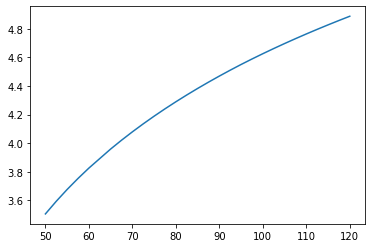

In [17]:
plt.plot(Temp,arr_cube)          # Plot of convection Coefficient (Cube) wrt Temprature

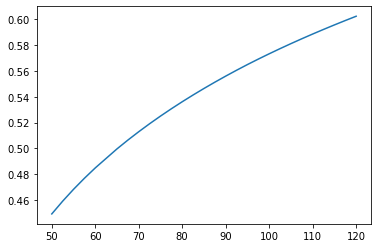

In [18]:
plt.plot(Temp,arr_sphere)   # Plot of convection Coefficient (Sphere) wrt Temprature

###  Average Convection Coefficient (Cube)

In [19]:
h_avg_cube= sum(arr_cube)/len(arr_cube)     # Average Convection Coefficient (Cube)
h_avg_cube

4.334840187533916

In [20]:
K_copper =  385.0  # average thermal conductivity of Copper over given temperature range(W/mK) 

### Calculate Biot Number for Cube :

In [21]:
# Characteristic length scale (V/As)
characteristic_L = 1/6.0    # Volume/ surface_Area (a^3 / 6a^2)
Biot_Cube = h_avg_cube*characteristic_L/K_copper 
print(Biot_Cube)

0.001876554193737626


### Average Convection Coefficient (Sphere)

In [22]:
h_avg_sphere = sum(arr_sphere)/len(arr_sphere)     # Average Convection Coefficient (Sphere)
h_avg_sphere

0.5410951854985135

### Calculate Biot Number for Sphere

In [23]:
# Characteristic length scale (V/As)
characteristic_L_sp = 0.62/3.0    # Volume/ surface_Area ((4/3)*pi*r^3 / 4*pi*r^2) ~(r/3.0)
Biot_sphere = h_avg_sphere*characteristic_L_sp/K_copper 
print(Biot_sphere)

0.00029045802165288175


### **From above results, We found that Biot Number is less than 0.1 in both cases, which proves that our assumption of considering negligible temperature gradient inside body are correct....**

In [24]:
for i in range(len(arr_cube)):   # Values of Convection coefficient for cube
    print(arr_cube[i])
    

3.5060972499188647
3.59459245459444
3.6769966531849447
3.7539381686691953
3.8262905090090724
3.959308855954819
4.020798156873255
4.079382316656774
4.1353314670451
4.188878200309748
4.240147706880323
4.289391915285443
4.336766216509414
4.382408139927624
4.426440060554228
4.468971404426818
4.510100460796675
4.549915883131666
4.588148851692777
4.62521854401102
4.66119175364631
4.696129564566965
4.730088000319033
4.763118581955163
4.7952688098503655
4.826582581664624
4.857121107044072
4.886901636470929


In [25]:
for i in range(len(arr_sphere)):       # Values of Convection coefficient for sphere
    print(arr_sphere[i])
  
    

0.4493320263825968
0.4591902453010975
0.46835171068295167
0.4768922588116842
0.4849123254967974
0.4996334104610591
0.5064299248109173
0.512901423161939
0.5190789979081977
0.5249893458373346
0.5306470626179887
0.5360806980645381
0.541307947595848
0.5463444348261399
0.5512040293504102
0.5558991051173054
0.5604407523381818
0.5648389526874069
0.5690656694720191
0.5731659069658073
0.577147134017505
0.5810161679215835
0.5847792495101864
0.5884421075892444
0.5920100144983756
0.5954878342348666
0.5988819048128723
0.6021945534835247


### Using https://mycurvefit.com/ for curve fitting and  h(effective) eqn generation. 
#### Equation : heff= (1.437065 + 0.05147343*x - 0.0001968346*x^2)

In [26]:
cp= 385
m = 8960
def f(x):
    return m*cp/((1.437065 + 0.05147343*x - 0.0001968346*x**2)*(x-25))

### Using Scipy Library to find the exact integral with minimum error

In [27]:
from math import cos, exp, pi
from scipy.integrate import quad

    
res, err = quad(f, 120, 50)

print("The numerical result is {:f} (+-{:g})"
    .format(res, err))  

The numerical result is -1115605.776168 (+-3.00402e-05)


#### The Exact Result comes out to be 1115605 secs ~ 308 hrs 
#### Which is very close to our estimated value of 298 Hrs proving our estimation  nearly correct.